In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

문제1 : 찍어서 문제 맞출 확률, 정말 25%라고 볼 수 있을까?

시나리오 : 수능 영어 듣기 평가에서 총 20문항이 있으며, 각 문항은 4지선다형이다. 시험이 끝난 뒤, 한 학생 A가 "시험 도중 너무 졸려서 듣기 내용을 거의 듣지 못했고, 모든 문항 다 찍었는데 반이나 맞췄음!!!" 이라고 말한다. 이를 들은 친구들이 "4지선다를 다 찍어서 절반이나 맞추는게 말이 되냐? 어느 정도는 듣고 푼 거 아님?" 이라고 다른 친구들이 학생 A가 어느 정도는 문제를 듣고 풀었을 가능성을 제기한다.
이 주장을 통계적으로 검증해보자.

수행 과제 : 이항검정(Binomial Test)을 사용하여, 학생 A의 관측 결과(20문항 중 10문항 정답)가 각 문항을 맞힐 확률이 p=0.25 라는 귀무가설과 일치하는지 검증하세요. 유의수준 5%에서 p-value를 계산하고, 귀무가설을 기각할 수 있는지 여부를 판단한 뒤, 그 결과를 바탕으로, '학생 A가 전부 무작위로 찍었다’는 주장을 통계적으로 받아들일 수 있는지 여부를 해석하세요

관찰 결과: 20개 문제 중 10개 맞춤
p-value: 0.0170
2.0
9.0


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


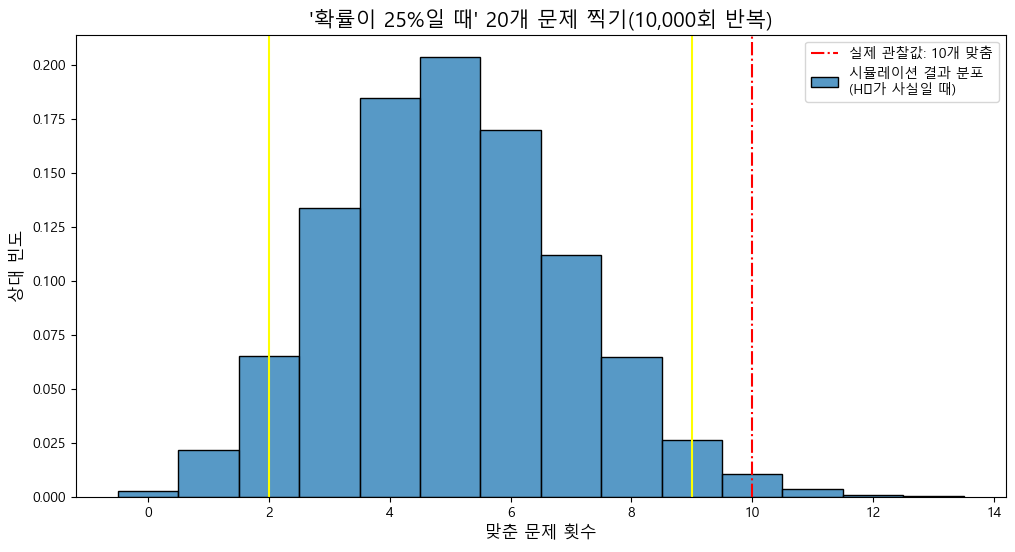

In [3]:
# 1-1문제 설정
n = 20  # 총 문제 개수
x = 10   # 관찰된 맞춘 문제 횟수
p = 0.25  # 귀무가설에서의 성공 확률
# H₀ (귀무가설): 실제 확률은 25프로 p = 0.25
# H₁(대립가설): 실제확률은 25프로가 아니다 p != 0.25


result = stats.binomtest(x, n, p=p, alternative='two-sided')


p_value = result.pvalue


print(f"관찰 결과: {n}개 문제 중 {x}개 맞춤")
print(f"p-value: {p_value:.4f}")



# 1-2 시뮬레이션 설정
# 20문제 풀기를 10,000번 반복 수행
num_simulations = 10000
simulated_successes = np.random.binomial(n=n,p=p,size=10000)



#1-3신뢰구간
ci_low = np.percentile(simulated_successes, 2.5)
ci_high = np.percentile(simulated_successes, 97.5)
print(ci_low)
print(ci_high) 



# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_successes, discrete=True, stat='density', label='시뮬레이션 결과 분포\n(H₀가 사실일 때)')
plt.axvline(x=x, color='red', linestyle='-.', label=f'실제 관찰값: {x}개 맞춤')
plt.axvline(x = ci_low, color = 'yellow', linestyle ='-')
plt.axvline(x = ci_high, color = 'yellow', linestyle ='-')
plt.title("'확률이 25%일 때' 20개 문제 찍기(10,000회 반복)", fontsize=15)
plt.xlabel("맞춘 문제 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()


2번 문제

대응표본 t-검정을 수행하기 전에 평균차이값의 정규성을 확인하고, 모집단의 등분산성도 확인해야 한다 (T/F)

거짓!

"대응표본 t-검정은 두 관측치 간의 '차이'를 분석하는 것으로, 내부적으로는 일표본 t-검정과 동일한 원리를 갖습니다. 따라서 두 집단 간의 분산을 비교하는 등분산성 가정은 필요하지 않으며, 오직 '차이값'에 대한 정규성 가정만 충족되면 됩니다."